# Introduction to tensorflow

In this tutorial we are going to learn the essentials of `tensorflow` which is a Python Machine Learning library which is particularly suitable for building neural networks.

This tutorial is based on the tutorial by [Alexey Ozerin](https://github.com/m12sl).

## Installation

We will be using `tensorflow` for CPU, version 1.3 or above. It can be installed with the following command:
```
pip install tensorflow
```

You can use other ways of installing TF, see the [official website](https://www.tensorflow.org/install/)

## Tutorial plan

1. [Intro](#Intro)
2. [Graphs and sessions](#Graph-and-Session)
3. [Variables](#Variables)
4. [Exercises on tensor operations](#Exercises)
5. [Linear regression](#Linear-regression)
6. [MNIST classification](#MNIST-classification)
7. [\*Extra task - Variable scopes](#*Extra-task)


TF is a tool for machine learning. It supports automatic differentiation and is capable of working on distributed systems. 

[Tensorboard](https://www.tensorflow.org/programmers_guide/summaries_and_tensorboard) - package for monitoring your model's parameters.

[Tensorflow Hub](https://www.tensorflow.org/hub/) - a set of pre-trained models.

This notebook has a couple of exercises. We recommend doing them on your own to get a grasp of TF. We also strongly advise to run cells with different parameters and variations in code -- this will help you to get used to TF faster. 

## Intro

Let's first recall `numpy`

In [1]:
import numpy as np

a = np.zeros((2, 2))
b = np.ones((2, 2))
c = np.array([1,2])

print(np.sum(b, axis=1))
print(b + c)

print(a.shape)

print(np.reshape(a, (1, 4)))
print(np.reshape(a, (-1, 4)))

[2. 2.]
[[2. 3.]
 [2. 3.]]
(2, 2)
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]


Now we are going to do the same in `tensorflow`

In [5]:
import tensorflow as tf
tf.InteractiveSession()  # We'll discuss sessions later

/anaconda2/lib/python2.7/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


The objects `a`, `b`, and `c` are instances of `tf.constant` (i.e. their values cannot change).

In [20]:
a = tf.zeros((2, 2))
b = tf.ones((2, 2))
c = tf.constant([1,2], dtype=tf.float32)

We assigned values to `a`, `b`, and `c` -- they are now a part of our computational graph (althought there are no connections between them).

Try checking their values:

In [4]:
print('"a": ', a)
print('"b": ', b)
print('"c": ', c)

('"a": ', <tf.Tensor 'zeros:0' shape=(2, 2) dtype=float32>)
('"b": ', <tf.Tensor 'ones:0' shape=(2, 2) dtype=float32>)
('"c": ', <tf.Tensor 'Const:0' shape=(2,) dtype=float32>)


We did not get the values, but only types of the objects. That is because in order to get a value of any node in a TF graph you should execute the graph.

The execution is done with eval() command:

In [7]:
print('Value of "a": ', a.eval())
print('Value of "b": ', b.eval())
print('Value of "c": ', c.eval())

('Value of "a": ', array([[0., 0.],
       [0., 0.]], dtype=float32))
('Value of "b": ', array([[1., 1.],
       [1., 1.]], dtype=float32))
('Value of "c": ', array([1., 2.], dtype=float32))


Let us create more complicated nodes that require actual computations:

In [21]:
print(tf.reduce_sum(b, axis=1).eval())  # don't forget about eval()
print(tf.add(b, c).eval())

[2. 2.]
[[2. 3.]
 [2. 3.]]


And finally, operations on `a`:

In [24]:
# This is not an operation on graph - it just gets the information about the node,
# so we don't need eval()
print(a.get_shape())

# These operations change the node, though
print(tf.reshape(a, (1, 4)).eval())
print(tf.reshape(a, (-1, 4)).eval())

(2, 2)
[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]]


## Graph and Session

There are essential objects in TF which have to appear in any code that uses TF - these are `Session` and `Graph`. In the above code we used them implicitly, let's now look into them in more detail.

### Graph

A computational graph is a network of nodes, with each node representing an arithmetic operation.
For example, let's consider the following code:
```
a = tf.constant(1)
b = tf.constant(3)
c = a + b
d = b + 1
e = c * d
```
The computational graph will look as follows:
<img src="graph_example.png" style="width: 400px">

The actuall TF graphs look different because of TF internal operations, but the idea is the same.

Note that all constants and variables that you define are added to graph, even if you don't define the graph object explicitly. In this case they are saved in `default graph`. You can get the access to your graph with procedure `tf.get_default_graph()`.

In [28]:
# We can save the graph with the following line of code
file_writer = tf.summary.FileWriter('/Users/yaroina-kente/just-initial/', tf.get_default_graph())

FileWriter object writes all information about your TF graph (graph itself, values of variables, etc.) in a file. You should provide a directory to save the information, and the graph to save.

After running the above cell you'll be able to see the graph using `tensorboard` tool you should go to the directory of this notebook and run the following command in shell:
```
tensorboard --logdir=./
```
and then open the page http://localhost:6006 in your browser.

### Session

Building of a graph does not automatically execute it. In order to get the values of nodes you should compute your graph in a `Session`. `Session` creates an environment to execute a graph, you can't do it outside a session.

The method `run()` of a session performs computations. It has one required element -- a node to compute.

In [33]:
a = tf.ones(5)
with tf.Session() as session:
    print(session.run(a))

[1. 1. 1. 1. 1.]


Unlike `Graph`, `Session` is not defined implicitly. There is a function `tf.get_default_session()`, but you need to specify which `Session` you will use as default.
In iPython it is convenient to use `InteractiveSession` object (as we did above). If an instance of the `InteractiveSession` class has been created, it is treated as a default session. If you have an `InteractiveSession`, you can use `eval()` procedure in your code which is in fact equivalent to 

```tf.get_default_session().run()```

**NB**: In notebooks it is easier to use `InteractiveSession`, but it is not recommended in scripts. There, you  should separate building of the graph from computations.

In [35]:
# let's recap different ways of evaluating nodes of a graph
a = tf.constant(-2.0)
b = tf.constant(3.0)
c = a * b

# let's create a session explicitly
with tf.Session() as sess:
    print(c)              # print the name of a node in the graph
    print(sess.run(c))    # compute the node and print the result
    print(c.eval())       # another way of computing the node

# the graph is saved, you can look at it using `tensorboard`
file_writer = tf.summary.FileWriter('./second-try', tf.get_default_graph())

Tensor("mul_1:0", shape=(), dtype=float32)
-6.0
-6.0


### Exercise - arithmetic operations

Let's now practice in using `tensorflow` for basic computations. 

You decided to put $10000 in your bank for 2 years. The bank has a fixed deposit plan with an interest rate of 3%. This means that the sum of money that bank returns you is computed according to the following formula:

$$return = initial \times (1+interest)^{years}$$

Use tensorflow arithmetic operations to compute the sum you will have on your account in 2 years.

**NB**: don't forget to declare the data types of tensors. Types assigned by default can lead to an error.

In [36]:
import tensorflow as tf
sess = tf.InteractiveSession()

####Your code here#####

i = tf.constant(10000.0)
rate = tf.constant(0.03)
years = tf.constant(2.0)

r = i*((1+rate)**years)

with tf.Session() as sess:
    print(r.eval()) 

#######################

10609.0


Check yourself: you should get `10609.0`

## Variables

So far we experimented only with constant tensors - they can be created using functions `tf.Tensor()`, `tf.constant()`, `tf.zeros()`, etc. They don't save values between runs of a graph - which means that you can't use them to store weights of our model, accumulated statistics and other information that you need to save between runs.

For that we will use `Variable` objects.

`Variable` constructor accepts constant of any type. An important difference between `Variable` and `constant` is that variable requires initialisation.

In [50]:
tf.reset_default_graph() # reset the graph

W1 = tf.ones((2, 2))  # a 2x2 tensor of ones
#W2 = tf.Variable(tf.zeros((2, 2)), name='weights')
W2 = tf.get_variable('weights', shape = (2,2), initializer = tf.zeros_initializer())

with tf.Session() as sess:
    print(sess.run(W1))
    
    sess.run(tf.global_variables_initializer())  # initialises all Variables, try running the code without it
    print(sess.run(W2))
    
# check the graph for variables
file_writer = tf.summary.FileWriter('./vars', tf.get_default_graph())

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]


Another way of creating a `Variable` is to call `tf.get_variable()`. It is called as follows:
```
var = tf.get_variable('my_var', shape=(3,4), initializer=tf.random_normal_initializer())
```
The first argument is variable name. 

The difference between `tf.get_variable` and `Variable` constructor is that you need to pass the initial value of a variable to the constructor, whereas when using `tf.get_variable` you need to define variable shape and the way of initializing it (e.g. from the normal distribution).

### Exercise

Change the above code so that variable `W2` is created with the function `tf.get_variable`.

**NB:** you can use `tf.zeros_initializer`.

### Running a graph multiple times

Once we have `Variables` which save values between the runs, we can try computing a graph multiple times.

All the computations in a graph should be organised differently from how you would do it in regular Python code.

This is an example of making a counter in a graph to count the number of training epochs

In [76]:
tf.reset_default_graph() # try commenting out and running the cell multiple times
                         # what happens with the computational graph?

state = tf.Variable(0, name="counter")
new_value = tf.add(state, tf.constant(1))

update_op = tf.assign(state, new_value)   # state <- new_value

file_writer = tf.summary.FileWriter('./counter', tf.get_default_graph())

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(state.eval())
    
    for i in range(10):
        sess.run(update_op)
        print(state.eval())
        
file_writer = tf.summary.FileWriter('./counter', tf.get_default_graph())

0
1
2
3
4
5
6
7
8
9
10


### Exercise

Recall the task about the bank deposit. You put \$10000 in your bank, and the amout of money you have is computed as $return = initial \times (1+interest)^{years}$. You want to compute how much money you will have in 1, 2, 3, ..., 20 years. You can now do that in `tensorflow` using one graph.

In [87]:
tf.reset_default_graph() 
sess = tf.InteractiveSession()

# define years as a Variable
# define an operation to update the value of `years`
# define other data in the same way as before.
####Your code here####

i = tf.constant(10000.0)
rate = tf.constant(0.03)
years = tf.Variable(0.0, name="years")
new_value = tf.add(years, tf.constant(1.0))

update_op = tf.assign(years, new_value)
r = i*((1+rate)**years)

######################

# and now compute the value in a loop
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(years.eval())
    
    for k in range(20):
        ####Your code here####
        sess.run(update_op)
        print(years.eval())
        print(r.eval())
        ######################
        pass

0.0
1.0
10300.0
2.0
10609.0
3.0
10927.27
4.0
11255.087
5.0
11592.738
6.0
11940.521
7.0
12298.736
8.0
12667.697
9.0
13047.729
10.0
13439.16
11.0
13842.335
12.0
14257.604
13.0
14685.332
14.0
15125.891
15.0
15579.667
16.0
16047.057
17.0
16528.469
18.0
17024.322
19.0
17535.05
20.0
18061.104


### Loading external data

`Variables` serve for changeable objects (e.g. model weights). We don't need them to store the input data, because it doesn't change.

However, the graph is built before actual computations or loading the data. It means that we cannot use `constant` tensors for inputs. Instead of that we will use `placehoders`. They are tensors that can be placed in a graph without initialisation.

When a graph has already been created, you can insert your data into a `placehoder` using `feed_dict`.

`feed_dict` is a dictionary where keys are **placeholders** which you need to compute the node, and values are **data objects** you need to use instead of these placeholders.

When defining a `placeholder` you need to define its type and shape. However, if you don't know some of the dimensions (e.g. size of your dataset), you can replace them with `None`:
```
my_input = tf.placeholder(tf.float32, (None, 5))
```
`my_input` is a matrix with 5 columns and unknown number of rows.

In [89]:
# placeholders for vectors of unknown size
inp1 = tf.placeholder(tf.float32, (None))
inp2 = tf.placeholder(tf.float32, (None))

out = inp1 * inp2

# we first feed in single numbers
with tf.Session() as sess:
    feed_dict = {inp1: 10, inp2: -4}
    print(sess.run(out, feed_dict=feed_dict))

-40.0


In [90]:
# And now try arrays
with tf.Session() as sess:
    # make sure that the operation can be done on objects of given sizes
    feed_dict = {inp1: np.array([10]), inp2: np.array([-4, 10, 100])}
    print(sess.run(out, feed_dict=feed_dict))
file_writer = tf.summary.FileWriter('./placeholders', tf.get_default_graph())

[ -40.  100. 1000.]


#### Exercise

Recall the task about the bank deposit once again. Your friend asked you to compute the sum of money they will have at their account in 2 years. But your friend has a different initial sum of money. With `placeholders` you can now create a graph to compute the return value for different initial sums

In [92]:
tf.reset_default_graph() 
sess = tf.InteractiveSession()

rate = tf.constant(0.03)
years = tf.constant(2.0)
i = tf.placeholder(tf.float32, (None))

r = i*((1+rate)**years)

with tf.Session() as sess:
    feed_dict = {i: 5000}
    print(sess.run(r, feed_dict=feed_dict))

5304.5


#### Exercise 

Change your code so that you can vary all parameters: initial sum, interest rate, and number of years.

In [95]:
tf.reset_default_graph() 
sess = tf.InteractiveSession()

rate = tf.placeholder(tf.float32, (None)) 
years = tf.placeholder(tf.float32, (None))
i = tf.placeholder(tf.float32, (None))

r = i*((1+rate)**years)

with tf.Session() as sess:
    feed_dict = {i: 10000, rate: 0.03, years : 3}
    print(sess.run(r, feed_dict=feed_dict))

10927.27


### Exercises

In order to familiarise yourself with tensor operations in TF we suggest you reading help about the following  functions:

**hint: use `<func_name>?` command in a new cell to get help on function `<func_name>` in iPython***

```
tf.cond
tf.greater
tf.case
tf.equal
tf.where
tf.gather
tf.range
tf.diag
tf.matrix_determinant
tf.unique
```

Below you'll find exercises that require using these functions.

**1**. Example. Create two tensors `x` and `y` with values picked randomly from any distribution
Create a tensor which contains `x + y` if `x > y` and `x - y` otherwise

In [100]:
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.random_uniform([])  # Empty array given as shape creates a scalar.
y = tf.random_uniform([])

out = tf.cond(tf.greater(x, y), lambda: x + y, lambda: x - y)
print(sess.run(out))

print(x.eval())
print(y.eval())

1.3705044
0.7459717
0.718709


**2**. Create two tensors `x` and `y` which contain random values from \[-1, 1\).
Create a tensor which contains `x + y` if `x < y`, `x - y` if `x > y` and `17` if `x == y`

In [169]:
tf.reset_default_graph()
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.random_uniform([], -1, 1, dtype=tf.float32)
y = tf.random_uniform([], -1, 1, dtype=tf.float32)
out = tf.case({tf.less(x, y): lambda: tf.add(x, y), 
        tf.greater(x, y): lambda: tf.subtract(x, y)}, 
        default=lambda: tf.constant(17.0), exclusive=True)

sess = tf.InteractiveSession()
print(sess.run(x))

Tensor("random_uniform:0", shape=(), dtype=float32)
0.2550707


The next task will help you to compute masks

**3**. Create a tensor `x` which contains `[[0, -2, -1], [0, 1, 2]]` and a zero tensor `y` of the same shape as `x`. Compute a boolean tensor of the same shape as `x` and `y` with True values in places where values from `x` and `y` match.

In [170]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

x = tf.constant([[0.0,-2.0, -1.0], [0.0, 1.0, 2.0]])
y = tf.zeros_like (x)
out = tf.equal(x,y)

print(sess.run(out))

[[ True False False]
 [ True False False]]


**4**. Create a tensor with shape `[20, ]` filled with random numbers from 99 to 101. Compute indices of elements with values grater than 100. Get values of these elements.

In [172]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

x = tf.random_uniform(shape=[20,], minval=99, maxval=102, dtype=tf.int32)
idx = tf.where(x > 100)
vals = tf.gather(x, idx)

print(sess.run(vals))

[[101]
 [101]
 [101]
 [101]
 [101]
 [101]
 [101]
 [101]]


Work with matrices

**5**. Create a diagonal 5x5 matrix where main diagonal stores values `1...5`.

In [175]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

values = tf.range(1,6)
d = tf.diag(values)
print(sess.run(d))

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


**6**. Create a square matrix 10x10 filled with random numbers from any distribution and compute the determinant of this matrix.

In [176]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

m = tf.random_normal([10, 10], mean = 10, stddev = 1)
det = tf.matrix_determinant(m)
print(sess.run((m, det)))

(array([[ 9.8642435, 10.398303 ,  9.79235  , 10.343996 ,  9.729421 ,
         9.319011 ,  9.98748  ,  8.998725 ,  8.808565 , 10.42958  ],
       [10.377178 ,  9.645718 , 10.126844 , 11.405236 ,  8.873443 ,
         9.131749 , 11.947019 ,  9.33957  , 10.95904  , 11.327178 ],
       [12.050882 ,  9.465801 ,  9.498543 ,  9.350488 , 11.905168 ,
         9.806078 ,  9.788611 ,  8.5228815,  9.72491  , 10.019714 ],
       [ 9.659422 , 10.085979 , 12.172923 , 11.838638 , 11.597965 ,
         9.466216 ,  9.885148 , 11.078767 ,  9.971878 , 10.146133 ],
       [ 8.57479  ,  8.642513 ,  9.698847 ,  9.624564 ,  8.862152 ,
         9.42959  ,  9.108872 , 11.17779  , 12.413511 ,  9.624547 ],
       [12.559023 ,  9.888772 ,  8.744758 , 10.835577 ,  9.108432 ,
         9.569823 ,  9.758384 , 11.340021 , 10.828331 , 10.096112 ],
       [ 8.5281925,  9.342571 ,  9.126167 , 10.289856 , 12.045213 ,
        11.127957 ,  9.091891 ,  9.032965 , 12.026509 , 11.58018  ],
       [10.217165 , 11.011111 ,  8.98506

**7**. Create a tensor with values \[6, 6, 7, 8, 8, 3, 8, 9, 6, 2, 6, 0, 1, 5, 5, 7, 2, 7, 7, 9\]. Get an array of unique elements of this tensor.

In [177]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

x = tf.constant([6, 6, 7, 8, 8, 3, 8, 9, 6, 2, 6, 0, 1, 5, 5, 7, 2, 7, 7, 9])
u = tf.unique(x)
print(sess.run(u))

Unique(y=array([6, 7, 8, 3, 9, 2, 0, 1, 5], dtype=int32), idx=array([0, 0, 1, 2, 2, 3, 2, 4, 0, 5, 0, 6, 7, 8, 8, 1, 5, 1, 1, 4],
      dtype=int32))


## Linear regression

Let's solve linear regression task on Boston Housing dataset. 
The dataset contains the information about houses in Boston area. The features are various parameters of houses. The target value (value you should predict) is the median price of houses in a given neighbourhood.

You can learn more about this dataset [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

Let's first look at the data.

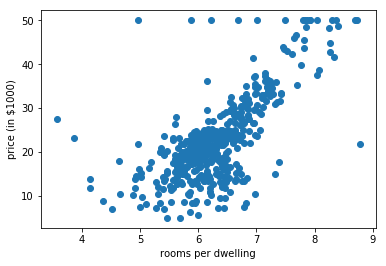

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt

# the data is already stored in sklearn library
# we'll take it from there
from sklearn.datasets import load_boston

x, y = load_boston(return_X_y=True)

# we'll use one feature for simplicity
# in our case it's the average number of rooms per dwelling
x = x[:, 5]

p = plt.scatter(x, y)
l = plt.xlabel('rooms per dwelling')
l = plt.ylabel('price (in $1000)')

In [237]:
# normalise feature values and the target value to make training more stable
x = x / x.std()
y = y / y.std()

# training parameters
tf.reset_default_graph()
batch_size = 32
n_samples = len(x)
n_features = 1


# convert the input data to Tensors
X_data = np.reshape(x, (-1, 1))
y_data = np.reshape(y, (-1, 1))

# create placeholders
# these should be tensors of type tf.float32
# X should be a matrix of size batch_size * n_features
# y should be a matrix of size batch_size * 1
X = tf.placeholder(tf.float32,[batch_size, n_features])
y = tf.placeholder(tf.float32,[batch_size, 1])

Let's now build the graph.

You should first define the parameters of the model - weight matrix `W` and bias vector `b`.

The shape of `W` is n_features $\times$ n_outputs (1 $\times$ 1 in our case).
The length of `b` is n_outputs (1 in our case).

You should initialise both variables with values from normal distribution (you can use `tf.random_normal_initializer()`).

Then you should define the value of prediction: $\hat{y} = X \times W + b$.

Finally, define the loss: 

$$L = \frac{1}{N} \sum_{i=0}^{N} (y_i-\hat{y_i})^{2}$$

where *N* is the number of samples

**NB**: you can multiply matrices with `tf.matmul` and sum vectors with `tf.reduce_sum`.

In [239]:
#tf.reset_default_graph()
with tf.variable_scope("my-profession"):
    
    # create weights of the model
    W = tf.Variable(tf.random_normal([n_features,1]))
    b = tf.Variable(tf.random_normal([1]))
    
    init = tf.initialize_all_variables()
    
    # define model prediction
    y_pred = tf.add(tf.matmul(X, W), b)
    # define loss
    loss = tf.reduce_sum(tf.square(y_pred - y))

Our task is to minimise `loss`. In order to do that we should define an optimiser and define an operation for it (minimisation). We recommend using Adam optimiser:

In [240]:
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss)

In [241]:
# write graph to a file
file_writer = tf.summary.FileWriter('./boston', tf.get_default_graph())

# we'll put values of loss here
train_history = []

with tf.Session() as sess:
    # don't forget to initialise variables
    sess.run(tf.initialize_all_variables())
    
    # train a model
    for _ in range(3000):
        idx = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[idx, :], y_data[idx, :]
        feed_dict = {X: X_batch, y: y_batch}
        loss_value, _ = sess.run([loss, train_op], feed_dict=feed_dict)
        train_history.append(loss_value)

#### Exercise

Draw a figure showing how the loss changed throughout the training. The values of loss for all epochs are saved in `train_history` variable.

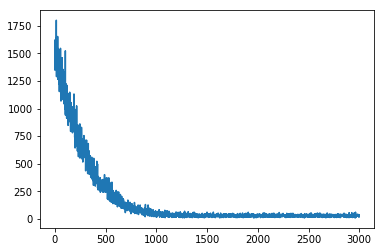

In [242]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_history)

## MNIST classification

Let's now build a neural network.
We will classify images from [MNIST](http://yann.lecun.com/exdb/mnist/) dataset.

In some tasks you might need to do low-level operations with variables and scopes. However, in most of cases you can use layers which are already defined in TF: `tf.layers`/`tf.contrib.layers`.

We will create a simple model with fully-connected layers:

In [22]:
# let's create a simple model with fully connected layers
import tensorflow as tf
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.int32, shape=(None,))

with tf.variable_scope("mnist-linear-regression"):
    # hidden layer with 40 cells with ReLU activation function
    # it takes X as input
    
    hidden1 = tf.layers.dense(X, 40, activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, 40, activation=tf.nn.relu)
    
    # output layer has 10 cells (corresponding to 10 classes)
    logits = tf.layers.dense(hidden2, 10, activation=None)
    
    # probability of every class computed as softmax function over outputs
    pred = tf.nn.softmax(logits)
    #cross-entropy loss
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits, labels=y)
    loss = tf.reduce_mean(loss)

# loss is minimised with Adam optimiser
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss)
file_writer = tf.summary.FileWriter('./very-mnist', tf.get_default_graph())

#### Exercise

Add another hidden layer to the above model. It should have 40 cells with ReLU activation function. It should take the output of `hidden1` as input. 

We will now load the dataset:

In [20]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data')

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


Finally, we can run the training:

In [33]:
batch_size = 32
iters = 5000
train_history = []
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for _ in range(iters):
        # pay attention to methods of `mnist` module
        X_batch, y_batch = mnist.train.next_batch(batch_size)
        feed_dict = {X: X_batch, y: y_batch}
        loss_value, _ = sess.run([loss, train_op], feed_dict=feed_dict)
        train_history.append(loss_value)
        
    for _ in range(iters):
        X_batch, y_batch = mnist.test.next_batch(batch_size)
        feed_dict = {X: X_batch, y: y_batch}
        loss_value, _ = sess.run([loss, train_op], feed_dict=feed_dict)
        print 'loss = %s' % loss_value
        


loss = 0.3131814
loss = 0.20345691
loss = 0.009864073
loss = 0.03567986
loss = 0.27254
loss = 0.06893168
loss = 0.40891927
loss = 0.06520602
loss = 0.036216006
loss = 0.2733618
loss = 0.18074344
loss = 0.32324696
loss = 0.07783464
loss = 0.16077636
loss = 0.13533905
loss = 0.16160779
loss = 0.15340564
loss = 0.08558453
loss = 0.13110413
loss = 0.12667474
loss = 0.050170917
loss = 0.11001366
loss = 0.054229096
loss = 0.33468336
loss = 0.053189218
loss = 0.07486473
loss = 0.010296805
loss = 0.2679902
loss = 0.17846605
loss = 0.025911273
loss = 0.03871318
loss = 0.26883572
loss = 0.1591227
loss = 0.07261591
loss = 0.31047907
loss = 0.034402724
loss = 0.112137854
loss = 0.12232709
loss = 0.06014689
loss = 0.14924686
loss = 0.078402966
loss = 0.26090884
loss = 0.0432662
loss = 0.013744041
loss = 0.07387605
loss = 0.19609223
loss = 0.2652557
loss = 0.18775499
loss = 0.04843473
loss = 0.007804719
loss = 0.024128428
loss = 0.15345874
loss = 0.038940273
loss = 0.034242347
loss = 0.156949
loss =

loss = 0.1499823
loss = 0.06967993
loss = 0.021616928
loss = 0.08234666
loss = 0.044603504
loss = 0.038872056
loss = 0.13495472
loss = 0.074697524
loss = 0.019281251
loss = 0.02260243
loss = 0.046705265
loss = 0.018069021
loss = 0.016376792
loss = 0.036308832
loss = 0.13606985
loss = 0.12702611
loss = 0.14986548
loss = 0.27866364
loss = 0.23795818
loss = 0.23788562
loss = 0.061466094
loss = 0.038024202
loss = 0.0694355
loss = 0.099811405
loss = 0.09395011
loss = 0.0922581
loss = 0.11194843
loss = 0.024304138
loss = 0.092324115
loss = 0.23262656
loss = 0.36034223
loss = 0.08320829
loss = 0.25187096
loss = 0.025355311
loss = 0.02153849
loss = 0.035243038
loss = 0.18218462
loss = 0.06623466
loss = 0.11131625
loss = 0.0508364
loss = 0.06624126
loss = 0.027992368
loss = 0.07489914
loss = 0.115824744
loss = 0.049079843
loss = 0.09832927
loss = 0.052439857
loss = 0.14190705
loss = 0.13035633
loss = 0.032858886
loss = 0.013568744
loss = 0.02885957
loss = 0.011569806
loss = 0.033484567
loss = 0

loss = 0.009563333
loss = 0.032892942
loss = 0.050584063
loss = 0.033828877
loss = 0.019731648
loss = 0.005977612
loss = 0.012636336
loss = 0.04064214
loss = 0.030056853
loss = 0.09161624
loss = 0.0066828253
loss = 0.041424185
loss = 0.07682994
loss = 0.011782762
loss = 0.012441025
loss = 0.0060166866
loss = 0.020220475
loss = 0.02221181
loss = 0.013231311
loss = 0.028693188
loss = 0.018208157
loss = 0.009710362
loss = 0.01035303
loss = 0.2067284
loss = 0.1184891
loss = 0.024093635
loss = 0.023487996
loss = 0.088068664
loss = 0.009293942
loss = 0.1264111
loss = 0.034827583
loss = 0.00925018
loss = 0.22049741
loss = 0.06549744
loss = 0.13205317
loss = 0.14246239
loss = 0.13410702
loss = 0.08239296
loss = 0.08183511
loss = 0.019117162
loss = 0.0088732615
loss = 0.060845196
loss = 0.042874042
loss = 0.0039134705
loss = 0.0104563935
loss = 0.051712453
loss = 0.093725696
loss = 0.017368242
loss = 0.057959974
loss = 0.05505227
loss = 0.011468669
loss = 0.093250275
loss = 0.023138631
loss = 0

loss = 0.07038678
loss = 0.019701652
loss = 0.057313696
loss = 0.004451047
loss = 0.010019872
loss = 0.018279428
loss = 0.014123433
loss = 0.04301817
loss = 0.054190256
loss = 0.06707129
loss = 0.0038228515
loss = 0.012448358
loss = 0.19665666
loss = 0.005345825
loss = 0.062106974
loss = 0.059948716
loss = 0.014820865
loss = 0.01911294
loss = 0.020431086
loss = 0.0037834363
loss = 0.039719384
loss = 0.048127133
loss = 0.027971592
loss = 0.15624948
loss = 0.036484092
loss = 0.012666451
loss = 0.020791199
loss = 0.015339596
loss = 0.025310505
loss = 0.0042686244
loss = 0.047857024
loss = 0.026316341
loss = 0.059049092
loss = 0.2514958
loss = 0.041071787
loss = 0.0030554177
loss = 0.03122313
loss = 0.024900023
loss = 0.02597797
loss = 0.03333556
loss = 0.09503198
loss = 0.043940917
loss = 0.026967935
loss = 0.10391432
loss = 0.005172981
loss = 0.06533689
loss = 0.03382592
loss = 0.005471224
loss = 0.04250169
loss = 0.052157342
loss = 0.028292468
loss = 0.05101505
loss = 0.0124023445
loss 

loss = 0.029806506
loss = 0.02560755
loss = 0.006996071
loss = 0.009468421
loss = 0.006064821
loss = 0.02357516
loss = 0.008683189
loss = 0.016629592
loss = 0.010519585
loss = 0.033958804
loss = 0.024373025
loss = 0.020621195
loss = 0.005827316
loss = 0.0053428425
loss = 0.025530698
loss = 0.014680762
loss = 0.008873452
loss = 0.033185266
loss = 0.011096489
loss = 0.04612219
loss = 0.021077465
loss = 0.026427407
loss = 0.011411158
loss = 0.040085245
loss = 0.007814445
loss = 0.008994265
loss = 0.01199593
loss = 0.0049326876
loss = 0.025827408
loss = 0.022949308
loss = 0.002432733
loss = 0.0021530404
loss = 0.060607824
loss = 0.0033229485
loss = 0.0046255626
loss = 0.030586757
loss = 0.034633163
loss = 0.03154418
loss = 0.013942622
loss = 0.019600268
loss = 0.009715652
loss = 0.012587656
loss = 0.04893401
loss = 0.02023156
loss = 0.015499842
loss = 0.011801081
loss = 0.01554328
loss = 0.010785278
loss = 0.004833388
loss = 0.009007864
loss = 0.0021434345
loss = 0.04975791
loss = 0.030370

loss = 0.019627437
loss = 0.015772833
loss = 0.013877112
loss = 0.008727567
loss = 0.0064982465
loss = 0.008820804
loss = 0.015693583
loss = 0.003231285
loss = 0.012357429
loss = 0.030842148
loss = 0.016232736
loss = 0.0041832887
loss = 0.010428225
loss = 0.051038273
loss = 0.0063601537
loss = 0.016920973
loss = 0.008867307
loss = 0.013806311
loss = 0.04185259
loss = 0.0026219867
loss = 0.0036158622
loss = 0.0079434225
loss = 0.016670434
loss = 0.008419709
loss = 0.0016776992
loss = 0.02229334
loss = 0.006498635
loss = 0.0061918898
loss = 0.050055586
loss = 0.0050632907
loss = 0.0035252813
loss = 0.0092524905
loss = 0.027504204
loss = 0.008764325
loss = 0.0024977957
loss = 0.004651953
loss = 0.0062517948
loss = 0.11706031
loss = 0.0076943035
loss = 0.0033258765
loss = 0.05007982
loss = 0.02640209
loss = 0.05834996
loss = 0.0039173914
loss = 0.0024336413
loss = 0.007412999
loss = 0.0122365635
loss = 0.013058344
loss = 0.043495025
loss = 0.008439189
loss = 0.003885342
loss = 0.0096744895

loss = 0.0025349944
loss = 0.0013021792
loss = 0.036504336
loss = 0.012204964
loss = 0.003760433
loss = 0.0006309629
loss = 0.002237333
loss = 0.017265934
loss = 0.006376289
loss = 0.0056276224
loss = 0.012572588
loss = 0.007101979
loss = 0.0058157025
loss = 0.015402716
loss = 0.0019495023
loss = 0.01039951
loss = 0.014400449
loss = 0.0067513925
loss = 0.009382986
loss = 0.004606572
loss = 0.0019783373
loss = 0.0034148027
loss = 0.0028087178
loss = 0.0018519867
loss = 0.0072825085
loss = 0.011576531
loss = 0.0039522
loss = 0.015242272
loss = 0.006139537
loss = 0.037268754
loss = 0.0026999633
loss = 0.0027168072
loss = 0.013668562
loss = 0.0033217957
loss = 0.001703938
loss = 0.004928895
loss = 0.013632436
loss = 0.002404014
loss = 0.003382591
loss = 0.025555626
loss = 0.0008645135
loss = 0.0108883325
loss = 0.017736906
loss = 0.014766379
loss = 0.0039087525
loss = 0.0059562866
loss = 0.0018127332
loss = 0.0038147718
loss = 0.003145434
loss = 0.003395708
loss = 0.014380792
loss = 0.0026

loss = 0.0034849127
loss = 0.0044878935
loss = 0.012545699
loss = 0.0030442283
loss = 0.009287787
loss = 0.00976602
loss = 0.0042956155
loss = 0.0068447455
loss = 0.0017256208
loss = 0.0020384854
loss = 0.0011152847
loss = 0.006027259
loss = 0.009678149
loss = 0.0067937127
loss = 0.004579274
loss = 0.020172283
loss = 0.003384261
loss = 0.0026588498
loss = 0.0054117283
loss = 0.0009291719
loss = 0.0010577254
loss = 0.00091006927
loss = 0.002409616
loss = 0.0030182374
loss = 0.003847764
loss = 0.003467168
loss = 0.008913121
loss = 0.011687245
loss = 0.009616558
loss = 0.03208033
loss = 0.011633827
loss = 0.0013231597
loss = 0.00325628
loss = 0.0020042388
loss = 0.01897935
loss = 0.0035515344
loss = 0.011557056
loss = 0.023358004
loss = 0.010459367
loss = 0.02700992
loss = 0.002864258
loss = 0.0007722819
loss = 0.0029993376
loss = 0.012935834
loss = 0.007288661
loss = 0.008194501
loss = 0.009340947
loss = 0.0069564097
loss = 0.005073895
loss = 0.0063108485
loss = 0.0025606442
loss = 0.004

loss = 0.0008515624
loss = 0.0033994168
loss = 0.0013668279
loss = 0.0020607556
loss = 0.00072222867
loss = 0.004199508
loss = 0.003824462
loss = 0.005591838
loss = 0.010939723
loss = 0.0032276078
loss = 0.0033667944
loss = 0.008948762
loss = 0.0020801995
loss = 0.016543385
loss = 0.0073009315
loss = 0.0040638694
loss = 0.00796435
loss = 0.0014331401
loss = 0.029089456
loss = 0.007909868
loss = 0.01374239
loss = 0.003037663
loss = 0.0023368155
loss = 0.0008067337
loss = 0.00027735115
loss = 0.008500137
loss = 0.0070646303
loss = 0.010219771
loss = 0.0015747686
loss = 0.0034479215
loss = 0.004352605
loss = 0.0016816563
loss = 0.0033077616
loss = 0.0047475817
loss = 0.0020510664
loss = 0.0069297254
loss = 0.0025641387
loss = 0.0078177685
loss = 0.0037170914
loss = 0.004421402
loss = 0.003600461
loss = 0.010775741
loss = 0.0011624446
loss = 0.00793022
loss = 0.004930324
loss = 0.0018849856
loss = 0.0008409409
loss = 0.007167451
loss = 0.0032510846
loss = 0.0030535816
loss = 0.0049818316
l

loss = 0.0015796134
loss = 0.019285321
loss = 0.0015915368
loss = 0.0022865105
loss = 0.002524803
loss = 0.034382157
loss = 0.0075416835
loss = 0.0064512677
loss = 0.002134298
loss = 0.0025945199
loss = 0.124580584
loss = 0.008813777
loss = 0.029192898
loss = 0.008714962
loss = 0.007902132
loss = 0.005816263
loss = 0.003509906
loss = 0.0044618114
loss = 0.024391932
loss = 0.0025359797
loss = 0.0068604294
loss = 0.004324278
loss = 0.035423066
loss = 0.011022284
loss = 0.003593376
loss = 0.028794114
loss = 0.0032522026
loss = 0.0038037803
loss = 0.0057010134
loss = 0.005306922
loss = 0.032754947
loss = 0.0068284906
loss = 0.059042934
loss = 0.006193228
loss = 0.004691128
loss = 0.0035050146
loss = 0.001422155
loss = 0.013324776
loss = 0.030499535
loss = 0.011733592
loss = 0.0054803
loss = 0.0005183639
loss = 0.00113795
loss = 0.0029114191
loss = 0.03942277
loss = 0.008844061
loss = 0.067033336
loss = 0.025568632
loss = 0.040845178
loss = 0.0014379303
loss = 0.0054355003
loss = 0.01135887

loss = 0.015648196
loss = 0.00018153427
loss = 0.0013035411
loss = 0.012106754
loss = 0.013445343
loss = 0.0009616504
loss = 0.005220372
loss = 0.005558486
loss = 0.0022316938
loss = 0.0016260187
loss = 0.0068591037
loss = 0.0025694934
loss = 0.0019067292
loss = 0.00023172767
loss = 0.0014976999
loss = 0.00063646614
loss = 0.0063176984
loss = 0.0044128937
loss = 0.0016031818
loss = 0.00092741346
loss = 0.003271976
loss = 0.0010449421
loss = 0.0044989856
loss = 0.0026881122
loss = 0.00083003746
loss = 0.0012582031
loss = 0.009955349
loss = 0.0006870092
loss = 0.0024827
loss = 0.007029506
loss = 0.0038645063
loss = 0.017832259
loss = 0.00030605265
loss = 0.0010360597
loss = 0.002411119
loss = 0.018049022
loss = 0.0015706476
loss = 0.008170791
loss = 0.001539404
loss = 0.00053233176
loss = 0.001112401
loss = 0.00093371706
loss = 0.0004906315
loss = 0.016933778
loss = 0.00680248
loss = 0.0028235528
loss = 0.00031689374
loss = 0.004443346
loss = 0.0058068032
loss = 0.0050032884
loss = 0.006

#### Exercise

Compute loss on the validation set and display it after every epoch.

## \*Extra task 

If you are already comfortable with the basics of `tensorflow`, you can tackle a more advanced topic of `Variable` scoping and reusing.

### Variable scope

Variable's `scope` can be defined explicitly in `tensorflow`. We might need it when we need to re-run code where we define variables.

Below we have a function where variables are defined:

In [34]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()

def model_run(input, n_features, n_examples):
    w = tf.get_variable('w', [n_features], initializer=tf.ones_initializer())
    biases = tf.get_variable('biases', 1, initializer=tf.ones_initializer())
    result = input * w + biases
    return result

Let's try running it for different inputs:

In [35]:
input1 = tf.constant(np.array([1, 2, 3, 4]), dtype=tf.float32)
input2 = tf.constant(np.array([10, 20, 30, 40, 50, 60]), dtype=tf.float32)

n_features = int(input1.shape[0])
res1 = model_run(input1, n_features, 1)

n_features = int(input2.shape[0])
res2 = model_run(input2, n_features, 1)

ValueError: Variable w already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-34-59411449affd>", line 6, in model_run
    w = tf.get_variable('w', [n_features], initializer=tf.ones_initializer())
  File "<ipython-input-35-de99fbd45762>", line 5, in <module>
    res1 = model_run(input1, n_features, 1)
  File "/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)


You should get an error saying that `Variable w already exists`. In order to avoid that we can compute results for different inputs in their own scopes:

In [36]:
tf.reset_default_graph()

input1 = tf.constant(np.array([1,2,3,4]), dtype=tf.float32)
input2 = tf.constant(np.array([10, 20, 30, 40, 50, 60]), dtype=tf.float32)

with tf.variable_scope("model1"):
    n_features = int(input1.shape[0])
    res1 = model_run(input1, n_features, 1)

with tf.variable_scope("model2"):
    n_features = int(input2.shape[0])
    res2 = model_run(input2, n_features, 1)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run((res1, res2)))

(array([2., 3., 4., 5.], dtype=float32), array([11., 21., 31., 41., 51., 61.], dtype=float32))


### Reusing variables

Sometimes we want to reuse a variable in different parts of a model. We can do that by setting `reuse` parameter of a scope to `True`, so that it can access variables that already exist:

In [56]:
tf.reset_default_graph()

with tf.variable_scope("collide"):
    v = tf.get_variable("v", [1])              # create a variable

with tf.variable_scope("collide", reuse=True):
    v1 = tf.get_variable("v")                  # reuse the existing variable
print(v.name, v1.name, v == v1)

(u'collide/v:0', u'collide/v:0', True)


In [60]:
tf.reset_default_graph()

print(tf.get_variable_scope().reuse)

with tf.variable_scope("collide"):
    v = tf.get_variable("v", [1])
    
    #tf.get_variable_scope().reuse_variables() # the properties of scope can be changed on the fly
    print(tf.get_variable_scope().reuse)
    
    v1 = tf.get_variable("v")             
print(v.name, v1.name, v == v1)

#get_variable_scope()- returns the current variable scope
#reuse_variables() - reuse variables in this scope
#compared to previos In[] we don't set reuse=True, that why returns Error


False
False


ValueError: Variable collide/v already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-60-f9ac86539ede>", line 6, in <module>
    v = tf.get_variable("v", [1])
  File "/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):


#### Exercise

Try commenting out the line `tf.get_variable_scope().reuse_variables()` and explain the result.

Variable `scopes` can be nested:

In [58]:
tf.reset_default_graph()

with tf.variable_scope("first"):
    with tf.variable_scope("second"):
        v = tf.get_variable('a', shape=[1, 2]) 

print(v.name)

first/second/a:0
